In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt

# load the data
df = pd.read_csv('5yr.csv')

# preprocess the data
data = df.filter(['Close'])
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * 0.8 ))

# scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

# create training dataset
train_data = scaled_data[0:training_data_len, :]

# split the data into X_train and y_train datasets
X_train = []
y_train = []

for i in range(60, len(train_data)):
    X_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

# reshape the data
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# create the neural network model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# create testing dataset
test_data = scaled_data[training_data_len - 60: , :]

# split the data into X_test and y_test datasets
X_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, 0])

X_test = np.array(X_test)

# reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1 ))

# make predictions on the test data
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# evaluate the model
r2 = r2_score(y_test, predictions)
print("R-squared:", r2)

# plot the data and predictions
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('LSTM Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Valid', 'Predictions'], loc='lower right')
plt.show()

Epoch 1/50
29/29 [==============================] - 5s 44ms/step - loss: 0.0474
Epoch 2/50
29/29 [==============================] - 1s 42ms/step - loss: 0.0060
Epoch 3/50
29/29 [==============================] - 1s 42ms/step - loss: 0.0047
Epoch 4/50
29/29 [==============================] - 1s 42ms/step - loss: 0.0046
Epoch 5/50
29/29 [==============================] - 1s 42ms/step - loss: 0.0048
Epoch 6/50
29/29 [==============================] - 1s 42ms/step - loss: 0.0041
Epoch 7/50
29/29 [==============================] - 1s 42ms/step - loss: 0.0043
Epoch 8/50
29/29 [==============================] - 1s 43ms/step - loss: 0.0045
Epoch 9/50
29/29 [==============================] - 1s 43ms/step - loss: 0.0047
Epoch 10/50
29/29 [==============================] - 1s 44ms/step - loss: 0.0044
Epoch 11/50
29/29 [==============================] - 1s 46ms/step - loss: 0.0038
Epoch 12/50
29/29 [==============================] - 1s 48ms/step - loss: 0.0037
Epoch 13/50
29/29 [==================

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13096\836790951.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


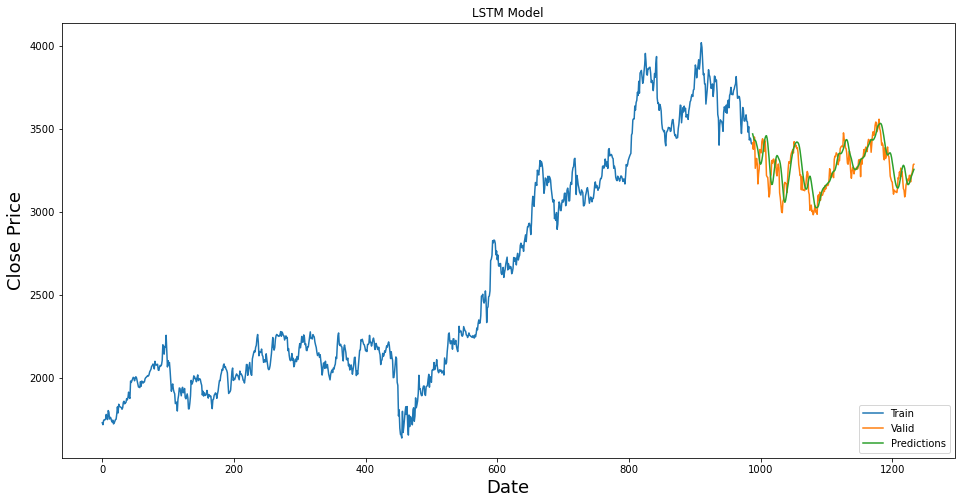

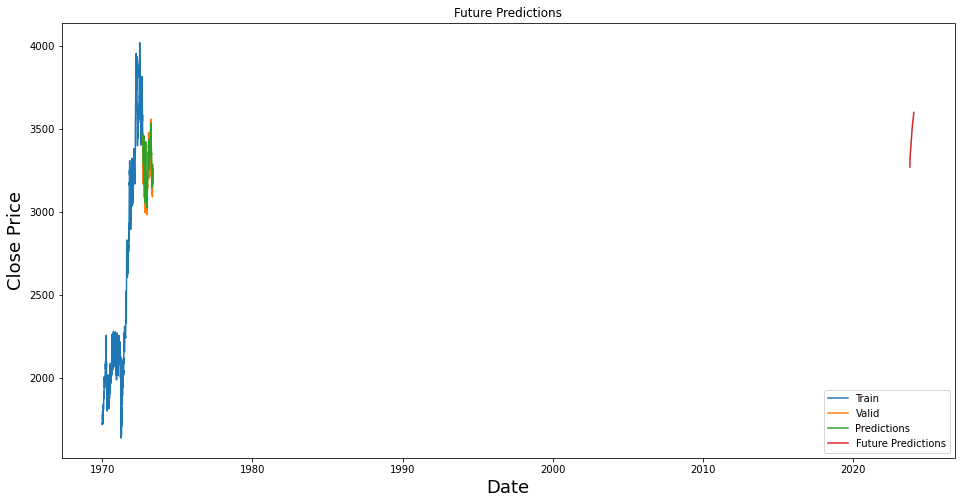

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt

# load the data
df = pd.read_csv('5yr.csv')

# preprocess the data
data = df.filter(['Close'])
dataset = data.values
training_data_len = int(np.ceil(len(dataset) * 0.8))

# scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# create training dataset
train_data = scaled_data[0:training_data_len, :]

# split the data into X_train and y_train datasets
X_train = []
y_train = []

for i in range(60, len(train_data)):
    X_train.append(train_data[i - 60:i, 0])
    y_train.append(train_data[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

# reshape the data
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# create the neural network model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# create testing dataset
test_data = scaled_data[training_data_len - 60:, :]

# split the data into X_test and y_test datasets
X_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    X_test.append(test_data[i - 60:i, 0])

X_test = np.array(X_test)

# reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# make predictions on the test data
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# predict the next day's close value
last_60_days = scaled_data[-60:]
last_60_days = np.reshape(last_60_days, (1, 60, 1))
next_day_prediction = model.predict(last_60_days)
next_day_prediction = scaler.inverse_transform(next_day_prediction)
print('The predicted close value for the next day is:', next_day_prediction[0][0])

# predict future close values
num_of_days = int(input('Enter the number of days to predict future close values: '))
future_predictions = []
for i in range(num_of_days):
    last_60_days = scaled_data[-60:]
    last_60_days = np.reshape(last_60_days, (1, 60, 1))
    next_day_prediction = model.predict(last_60_days)
    future_predictions.append(next_day_prediction[0][0])
    scaled_data = np.append(scaled_data, next_day_prediction, axis=0)
    scaled_data = np.delete(scaled_data, 0, axis=0)

future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# evaluate the model
r2 = r2_score(y_test, predictions)
print("R-squared:", r2)

# plot the data and predictions
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16, 8))
plt.title('LSTM Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Valid', 'Predictions'], loc='lower right')
plt.show()

# plot future predictions
last_date = df['Date'].iloc[-1]
date_range = pd.date_range(last_date, periods=num_of_days + 1, freq='D')[1:]
future_df = pd.DataFrame({'Date': date_range, 'Predictions': future_predictions.flatten()})

plt.figure(figsize=(16, 8))
plt.title('Future Predictions')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.plot(future_df['Date'], future_df['Predictions'])
plt.legend(['Train', 'Valid', 'Predictions', 'Future Predictions'], loc='lower right')
plt.show()
